In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn import linear_model
# Feature Selection functions to import
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
# Set svg format
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [38]:
df = pd.read_csv('diabetes.tsv', sep = '\t')

In [39]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [40]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [41]:
corrmat = df.corr()
print(corrmat)

          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.30

<AxesSubplot:>

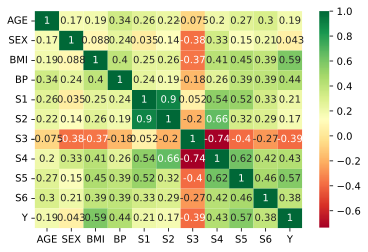

In [42]:
# Correlation witn matrix heatmap
sns.heatmap(corrmat, annot = True, cmap = 'RdYlGn')

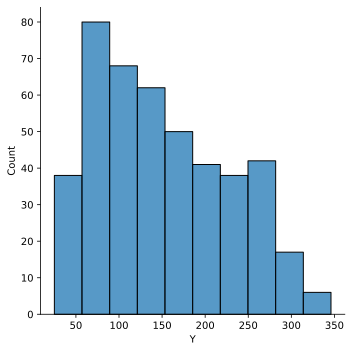

In [43]:
sns.displot(df['Y'])

In [44]:
_X = np.array(df.drop(labels = ['Y'], axis = 1))
_Y = np.array(df['Y'])

### Univariate selection

In [45]:
# Univariate selection
best_features = SelectKBest(score_func = chi2, k = 10)
fit = best_features.fit(_X, _Y)
bf_scores = pd.DataFrame(fit.scores_)
bf_columns = pd.DataFrame(df.iloc[:, 0:11].columns)
f_scores = pd.concat([bf_columns, bf_scores], axis = 1)
f_scores.columns = ['Attr', 'Score']
f_scores.nlargest(10, 'Score')

,Attr,Score
5,S2,1604.793179
4,S1,1291.924337
6,S3,892.187395
0,AGE,787.404197
3,BP,527.750447
9,S6,335.987490
2,BMI,213.750649
7,S4,106.348820
1,SEX,37.598305
8,S5,17.045165


### Feature importance

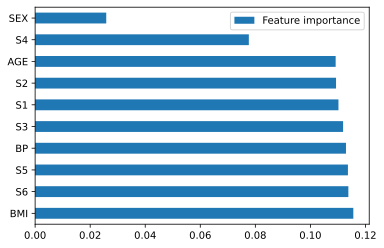

In [46]:
# Feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df.iloc[:, 0:10], df['Y'])
feat_importances = pd.Series(model.feature_importances_, df.iloc[:, 0:10].columns)
feat_importances.nlargest(10).plot(kind='barh', label = 'Feature importance')
plt.legend()
plt.show()

In [47]:
data = df.drop(labels = ['AGE', 'SEX', 'S1', 'S2', 'S3', 'S6'], axis = 1)
# data = df.copy()
x = np.array(data.drop(labels = ['Y'], axis = 1))
y = np.array(data['Y'])

In [48]:
# Normalize x
x = (x - x.min()) / (x.max() - x.min())

In [49]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size = 0.2)

In [50]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
linear_regression_accuracy = linear_regression.score(x_test, y_test)

In [51]:
print('Linear Regression Accuracy:', linear_regression_accuracy)

Linear Regression Accuracy: 0.44809202020732053


In [52]:
linear_reg_pred = linear_regression.predict(x_test)

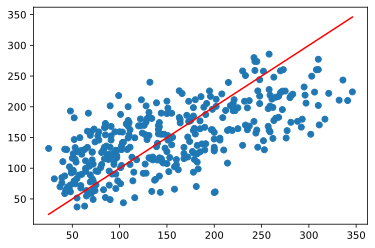

In [53]:
plt.scatter(y_test, linear_reg_pred)
p1 = max(max(y_test), max(linear_reg_pred))
p2 = min(min(y_test), min(linear_reg_pred))
plt.plot([p1, p2], [p1, p2], color = 'red')
plt.show()

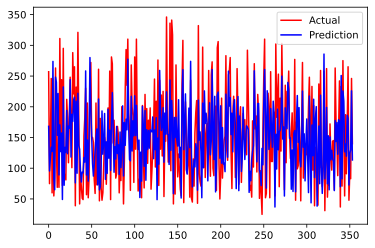

In [54]:
x_c = np.arange(len(linear_reg_pred))
plt.plot(x_c, y_test, color = 'red', label = 'Actual')
plt.plot(x_c, linear_reg_pred, color = 'blue', label = 'Prediction')
plt.legend()
plt.show()